<a href="https://colab.research.google.com/github/EWHA-AI24-Project/Weather-to-Wildfire-Prediction/blob/main/dataset_2_missing_order.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# CSV 파일을 불러오기
df = pd.read_csv('dataset_2.csv')

# === 결측치 있는 행 삭제 ===(결측치 거의 없으므로 그냥 삭제해서 처리함)
df_cleaned = df.dropna(ignore_index=True)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14976 entries, 0 to 14975
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATE                   14976 non-null  object 
 1   PRECIPITATION          14976 non-null  float64
 2   MAX_TEMP               14976 non-null  float64
 3   MIN_TEMP               14976 non-null  float64
 4   AVG_WIND_SPEED         14976 non-null  float64
 5   FIRE_START_DAY         14976 non-null  bool   
 6   YEAR                   14976 non-null  int64  
 7   TEMP_RANGE             14976 non-null  float64
 8   WIND_TEMP_RATIO        14976 non-null  float64
 9   MONTH                  14976 non-null  int64  
 10  SEASON                 14976 non-null  object 
 11  LAGGED_PRECIPITATION   14976 non-null  float64
 12  LAGGED_AVG_WIND_SPEED  14976 non-null  float64
 13  DAY_OF_YEAR            14976 non-null  int64  
dtypes: bool(1), float64(8), int64(3), object(2)
memory usa

In [ ]:
df_cleaned

,DATE,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,FIRE_START_DAY,YEAR,TEMP_RANGE,WIND_TEMP_RATIO,MONTH,SEASON,LAGGED_PRECIPITATION,LAGGED_AVG_WIND_SPEED,DAY_OF_YEAR
0,1984-01-01,0.0,79.0,51.0,4.70,False,1984,28.0,0.059494,1,Winter,0.0,4.700000,1
1,1984-01-02,0.0,71.0,46.0,5.59,False,1984,25.0,0.078732,1,Winter,0.0,5.145000,2
2,1984-01-03,0.0,70.0,47.0,5.37,False,1984,23.0,0.076714,1,Winter,0.0,5.220000,3
3,1984-01-04,0.0,76.0,45.0,4.70,False,1984,31.0,0.061842,1,Winter,0.0,5.090000,4
4,1984-01-05,0.0,74.0,49.0,5.14,False,1984,25.0,0.069459,1,Winter,0.0,5.100000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14971,2025-01-06,0.0,71.0,47.0,2.91,False,2025,24.0,0.040986,1,Winter,0.0,4.294000,6
14972,2025-01-07,0.0,73.0,49.0,13.42,False,2025,24.0,0.183836,1,Winter,0.0,5.815000,7
14973,2025-01-08,0.0,73.0,53.0,10.51,False,2025,20.0,0.143973,1,Winter,0.0,6.485714,8
14974,2025-01-09,0.0,68.0,46.0,4.92,False,2025,22.0,0.072353,1,Winter,0.0,6.550000,9


In [ ]:
# === 모델에 필요없는 변수(열) 삭제 ===

# 삭제할 열 인덱스를 리스트로 지정
cols_to_drop = [0, 6, 8, 9, 11, 12, 13]

# df.columns[cols_to_drop]를 이용해 실제 컬럼명을 가져와 삭제
df_col_cleaned = df_cleaned.drop(df.columns[cols_to_drop], axis=1)

# === 변수 순서 조정 -> 타겟(산불 여부)을 마지막 칼럼으로 ===
# 1. 전체 컬럼 리스트
cols = list(df_col_cleaned.columns)

# 2. FIRE_START_DAY를 리스트에서 제거하고 마지막에 추가
cols.append(cols.pop(cols.index('FIRE_START_DAY')))

# 3. 재정렬된 순서대로 데이터프레임을 재구성
df_reordered = df_col_cleaned[cols]

# 확인
df_reordered.info()

# csv로 저장
df_reordered.to_csv('dataset_2_ordered.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14976 entries, 0 to 14975
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PRECIPITATION   14976 non-null  float64
 1   MAX_TEMP        14976 non-null  float64
 2   MIN_TEMP        14976 non-null  float64
 3   AVG_WIND_SPEED  14976 non-null  float64
 4   TEMP_RANGE      14976 non-null  float64
 5   SEASON          14976 non-null  object 
 6   FIRE_START_DAY  14976 non-null  bool   
dtypes: bool(1), float64(5), object(1)
memory usage: 716.8+ KB


In [ ]:
df_reordered

,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,TEMP_RANGE,SEASON,FIRE_START_DAY
0,0.0,79.0,51.0,4.70,28.0,Winter,False
1,0.0,71.0,46.0,5.59,25.0,Winter,False
2,0.0,70.0,47.0,5.37,23.0,Winter,False
3,0.0,76.0,45.0,4.70,31.0,Winter,False
4,0.0,74.0,49.0,5.14,25.0,Winter,False
...,...,...,...,...,...,...,...
14971,0.0,71.0,47.0,2.91,24.0,Winter,False
14972,0.0,73.0,49.0,13.42,24.0,Winter,False
14973,0.0,73.0,53.0,10.51,20.0,Winter,False
14974,0.0,68.0,46.0,4.92,22.0,Winter,False


In [ ]:
# === 이상치 탐지 ===

df_numeric = df_reordered.iloc[:, :-2]

def outlier_ratio_iqr(df_numeric, column):
    Q1 = df_numeric[column].quantile(0.25)
    Q3 = df_numeric[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_numeric[(df_numeric[column] < lower) | (df_numeric[column] > upper)]
    ratio = len(outliers) / len(df_numeric) * 100

    print(f"[{column}] 이상치 개수: {len(outliers)}개 / 전체: {len(df_numeric)}개 ({ratio:.2f}%)")
    return outliers

# 이상치 비율 탐색
outlier_ratio_iqr(df_numeric, 'PRECIPITATION')
outlier_ratio_iqr(df_numeric, 'MAX_TEMP')
outlier_ratio_iqr(df_numeric, 'MIN_TEMP')
outlier_ratio_iqr(df_numeric, 'AVG_WIND_SPEED')
outlier_ratio_iqr(df_numeric, 'TEMP_RANGE')

[PRECIPITATION] 이상치 개수: 1381개 / 전체: 14976개 (9.22%)
[MAX_TEMP] 이상치 개수: 161개 / 전체: 14976개 (1.08%)
[MIN_TEMP] 이상치 개수: 2개 / 전체: 14976개 (0.01%)
[AVG_WIND_SPEED] 이상치 개수: 479개 / 전체: 14976개 (3.20%)
[TEMP_RANGE] 이상치 개수: 573개 / 전체: 14976개 (3.83%)


,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,TEMP_RANGE
0,0.0,79.0,51.0,4.70,28.0
3,0.0,76.0,45.0,4.70,31.0
49,0.0,72.0,44.0,6.26,28.0
50,0.0,72.0,43.0,5.82,29.0
57,0.0,79.0,50.0,8.05,29.0
...,...,...,...,...,...
14590,0.0,80.0,52.0,6.04,28.0
14856,0.0,102.0,73.0,6.71,29.0
14947,0.0,80.0,49.0,4.70,31.0
14958,0.0,83.0,51.0,3.80,32.0


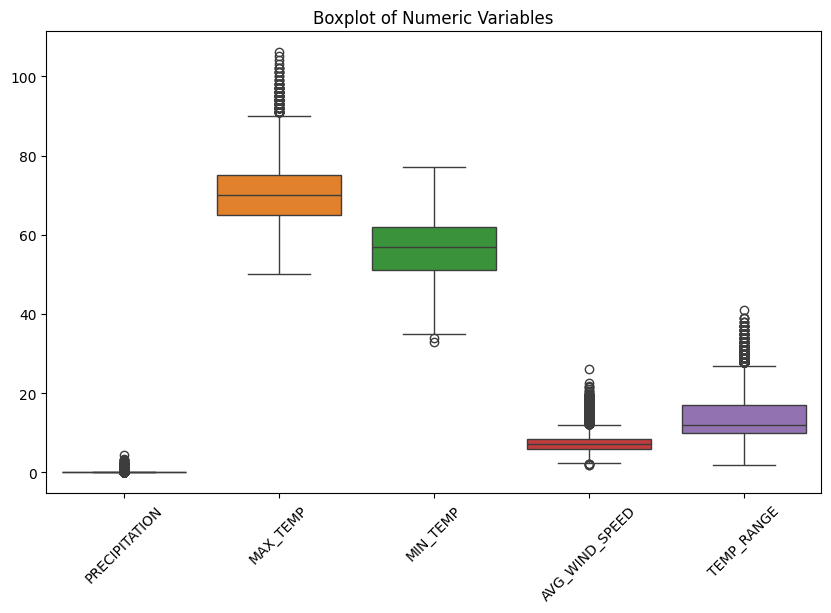

,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,TEMP_RANGE
count,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000
mean,0.032338,70.540932,56.499666,7.435098,14.041266
std,0.179607,7.261989,6.766055,2.129985,5.996128
min,0.000000,50.000000,33.000000,1.790000,2.000000
25%,0.000000,65.000000,51.000000,6.040000,10.000000
50%,0.000000,70.000000,57.000000,7.160000,12.000000
75%,0.000000,75.000000,62.000000,8.500000,17.000000
max,4.530000,106.000000,77.000000,26.170000,41.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_numeric)
plt.title('Boxplot of Numeric Variables')
plt.xticks(rotation=45)
plt.show()

df_numeric.describe()

In [ ]:
# 강수량 제외한 나머지 변수들 -> 이상치 비율이 5 % 이내
# 랜덤포레스트모델은 트리 기반 모델로 이상최에 둔감함(이상치가 매우 많은 경우 아니면 따로 처리 안 해도 됨)
# 강수량만 이상치 처리하면 됨(로그변환 + 클리핑)(이상치가 upper에 몰려있음)

import numpy as np

# 1. 로그 변환
df_numeric['PRECIPITATION'] = np.log1p(df_numeric['PRECIPITATION'])  # log(x + 1)
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14976 entries, 0 to 14975
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PRECIPITATION   14976 non-null  float64
 1   MAX_TEMP        14976 non-null  float64
 2   MIN_TEMP        14976 non-null  float64
 3   AVG_WIND_SPEED  14976 non-null  float64
 4   TEMP_RANGE      14976 non-null  float64
dtypes: float64(5)
memory usage: 585.1 KB


In [ ]:
df_numeric.describe()

,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,TEMP_RANGE
count,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000
mean,0.023446,70.540932,56.499666,7.435098,14.041266
std,0.113031,7.261989,6.766055,2.129985,5.996128
min,0.000000,50.000000,33.000000,1.790000,2.000000
25%,0.000000,65.000000,51.000000,6.040000,10.000000
50%,0.000000,70.000000,57.000000,7.160000,12.000000
75%,0.000000,75.000000,62.000000,8.500000,17.000000
max,1.710188,106.000000,77.000000,26.170000,41.000000
